In [27]:
import requests, json
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [5]:
# Uniswap subgraph
subgraph_id = 'QmWTrJJ9W8h3JE19FhCzzPYsJ2tgXZCdUqnbyuo64ToTBN'
subgraph_url = 'https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v2'

# Data generated from TheGraph Uniswap v2 public, hosted API at https://thegraph.com/explorer/subgraph/uniswap/uniswap-v2
# Token ID for WETH: 0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2
# Token ID for WBTC: 0x2260fac5e5542a773aa44fbcfedf7c193bc2c599

# Sample GraphQL query:
# Daily price data for WETH in USD. Change the token ID e.g. to WBTC above to test another token.

query = """query {
    tokenDayDatas(first:100, where: {token: "0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2"}, orderBy: date, orderDirection: desc) {
      date
      priceUSD
    }
}"""

# Call the public hosted TheGraph endpoint
url = 'https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v2'
r = requests.post(url, json={'query': query})
print(r.status_code)


200


# Activity by day

In [39]:
# define query
query = """query {
    uniswapDayDatas(first : 1000, orderBy: date, orderDirection: desc) {
        id
        date
        txCount
        dailyVolumeUSD
        dailyVolumeETH
        maxStored
    }
}"""

res = requests.post(subgraph_url, json={'query': query}).json()

day_datas = res['data']['uniswapDayDatas']

In [45]:
def create_plot(field, title):
    
    x = [datetime.fromtimestamp(row['date']) for row in day_datas]
    y = [float(row[field]) for row in day_datas]

    plt.plot(x,y)
    plt.title(title)
    plt.gcf().autofmt_xdate()
    plt.show()

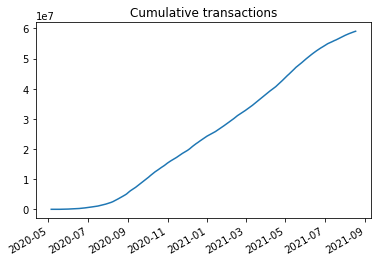

In [49]:
create_plot('txCount', 'Cumulative transactions')

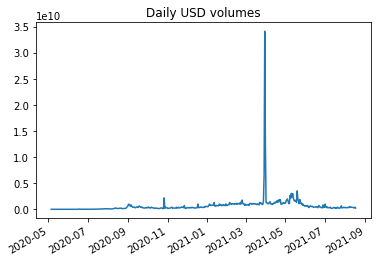

In [46]:
create_plot('dailyVolumeUSD', 'Daily USD volumes')

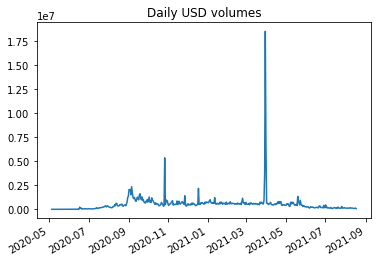

In [48]:
create_plot('dailyVolumeETH', 'Daily USD volumes')